# 📚 Import Libraries  

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")


# 📂 Read Data  

## 🔗 Sumber Data  
Dataset yang digunakan diambil dari Kaggle:  
[Medical Insurance Cost Dataset](https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset/data)  

Dataset ini berisi informasi mengenai biaya asuransi kesehatan berdasarkan beberapa faktor seperti usia, jenis kelamin, status merokok, dan wilayah tempat tinggal. Data ini sangat bermanfaat untuk menganalisis faktor-faktor yang memengaruhi biaya asuransi kesehatan.  


In [141]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 📝 Keterangan Data  

| Kolom      | Deskripsi                                                                 |
|------------|---------------------------------------------------------------------------|
| **age**    | Usia penerima manfaat utama (integer).                                     |
| **sex**    | Jenis kelamin penerima manfaat (male, female).                            |
| **bmi**    | Body Mass Index, ukuran lemak tubuh berdasarkan tinggi dan berat badan (float). |
| **children** | Jumlah anak yang ditanggung oleh asuransi kesehatan (integer).           |
| **smoker** | Status merokok penerima manfaat (yes, no).                                |
| **region** | Wilayah tempat tinggal di AS (northeast, northwest, southeast, southwest). |
| **charges** | Biaya asuransi kesehatan yang ditagihkan kepada penerima manfaat (float). |

# 👀 Data Overview 

Bagian ini digunakan untuk memahami struktur data secara umum sebelum dilakukan analisis lebih lanjut.  


## 🗂️ Data Info  

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 📏 Data Describe  

In [143]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 🏷️ Data Column  

In [144]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# 🧹 Cleaning Data  

Pada tahap ini dilakukan proses pembersihan data agar siap digunakan untuk analisis lebih lanjut, yaitu dengan cara:  


In [145]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [146]:
clean_data = data.copy()
clean_data.drop_duplicates(inplace=True)

clean_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 📊 Exploratory Data Analysis  

Pada tahap ini dilakukan **analisis data eksploratif (EDA)** untuk memahami pola, distribusi, serta hubungan antar variabel dalam dataset. Dengan EDA, kita dapat mengetahui faktor-faktor apa saja yang berpengaruh terhadap biaya asuransi kesehatan. Visualisasi data digunakan agar pola tersebut lebih mudah dipahami dan memberikan gambaran yang jelas sebelum masuk ke tahap pemodelan.  


In [147]:
data_vis = clean_data.copy()

## 🎂 Distribusi Usia Responden  

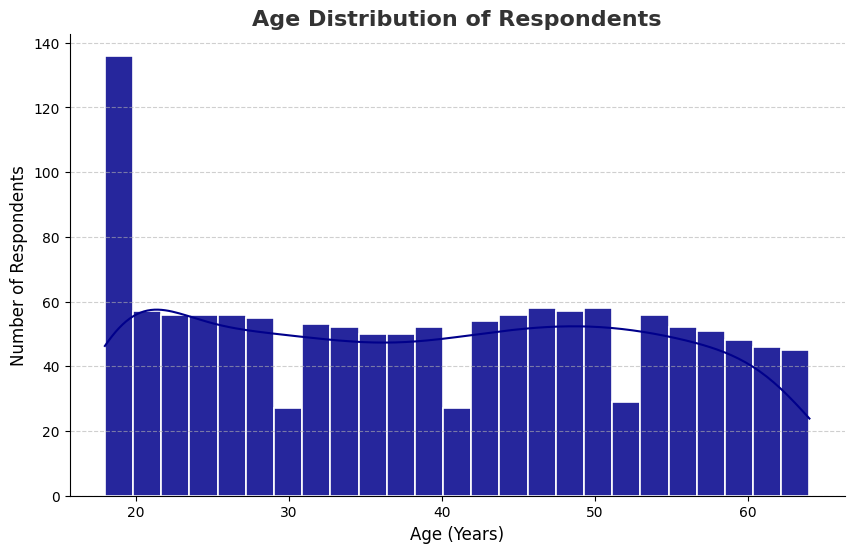

In [148]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data_vis['age'],
    bins=25,
    kde=True,
    color="darkblue",
    edgecolor="white",
    linewidth=1.2,
    alpha=0.85
)

plt.title("Age Distribution of Respondents",
          fontsize=16, fontweight="bold", color="#333333")
plt.xlabel("Age (Years)", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)

sns.despine(top=True, right=True)

plt.show()


## ⚖️ Distribusi BMI Responden  

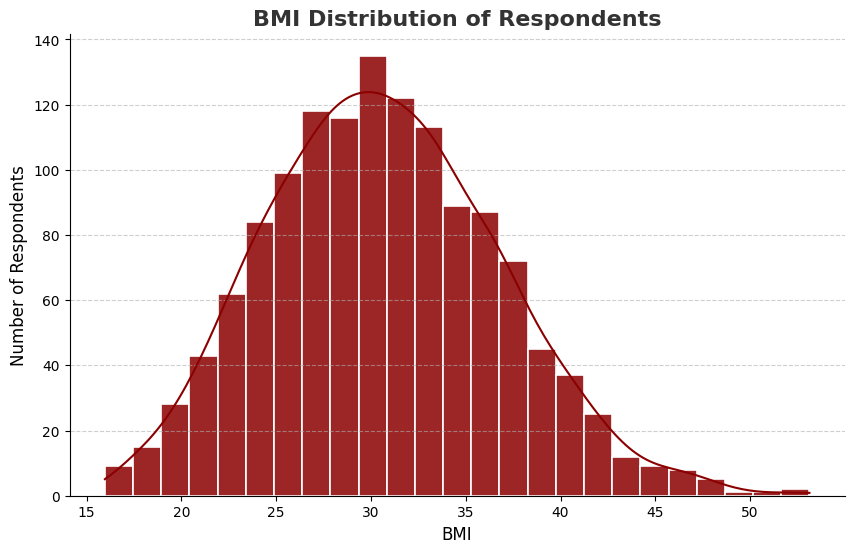

In [149]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data_vis['bmi'],
    bins=25,
    kde=True,
    color="darkred",
    edgecolor="white",
    linewidth=1.2,
    alpha=0.85
)

plt.title("BMI Distribution of Respondents",
          fontsize=16, fontweight="bold", color="#333333")
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
sns.despine(top=True, right=True)

plt.show()


## 💵 Distribusi Biaya Asuransi  

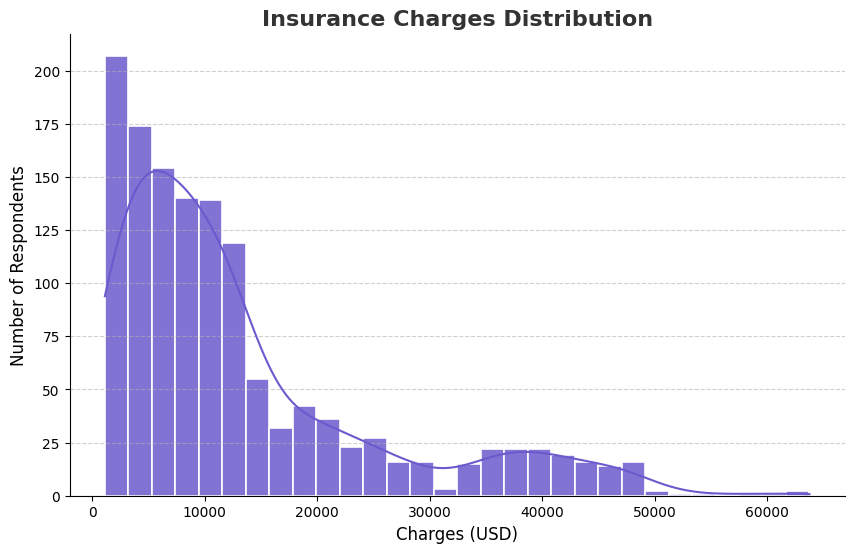

In [150]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data_vis['charges'],
    bins=30,
    kde=True,
    color="#6A5ACD",
    edgecolor="white",
    linewidth=1.2,
    alpha=0.85
)

plt.title("Insurance Charges Distribution",
          fontsize=16, fontweight="bold", color="#333333")
plt.xlabel("Charges (USD)", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
sns.despine(top=True, right=True)

plt.show()


## 🚬 Biaya Asuransi Berdasarkan Status Merokok  

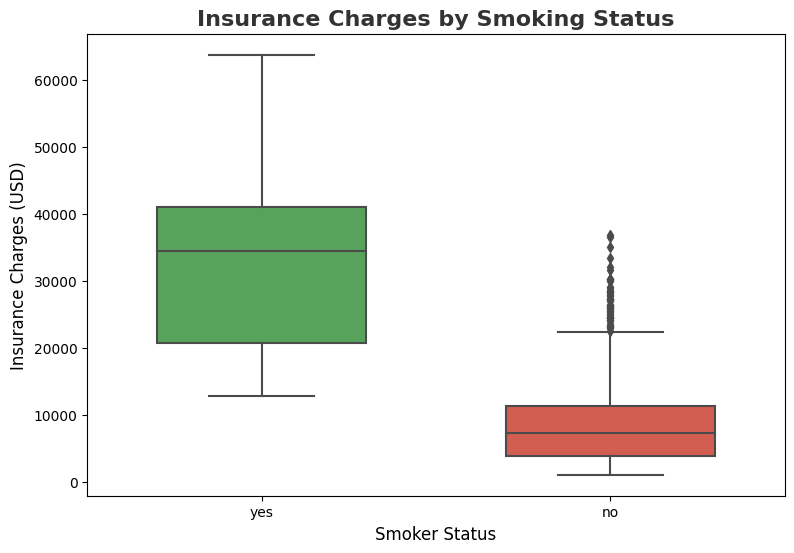

In [151]:
plt.figure(figsize=(9, 6))
sns.boxplot(
    x="smoker",
    y="charges",
    data=data_vis,
    palette=["#4CAF50", "#E74C3C"],
    width=0.6,
    
)

plt.title("Insurance Charges by Smoking Status",
          fontsize=16, fontweight="bold", color="#333333")
plt.xlabel("Smoker Status", fontsize=12)
plt.ylabel("Insurance Charges (USD)", fontsize=12)

plt.show()


## 🌍 Biaya Asuransi Berdasarkan Wilayah  

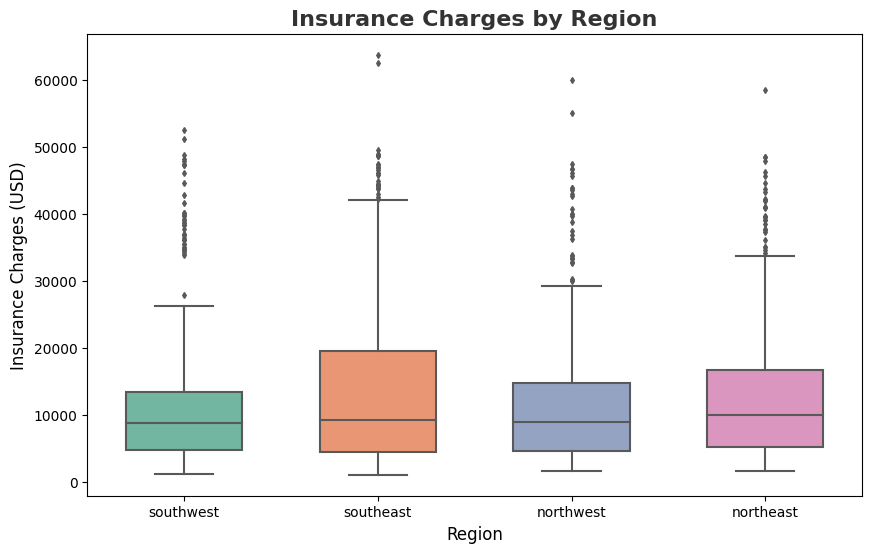

In [152]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    x="region",
    y="charges",
    data=data_vis,
    palette="Set2",
    width=0.6,
    fliersize=3
)

plt.title("Insurance Charges by Region", fontsize=16,
          fontweight="bold", color="#333333")
plt.xlabel("Region", fontsize=12)
plt.ylabel("Insurance Charges (USD)", fontsize=12)

plt.show()


## 📈 Biaya Asuransi vs Usia Berdasarkan Status Merokok  

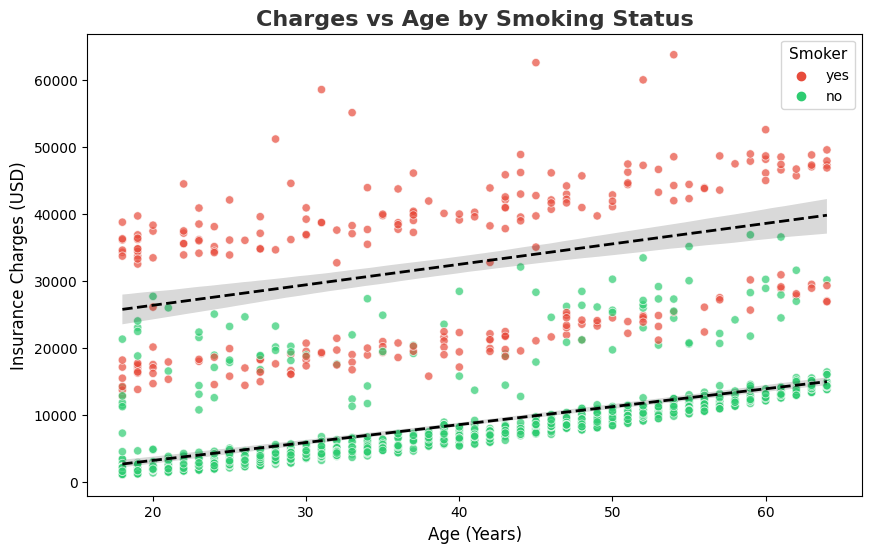

In [153]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x="age",
    y="charges",
    hue="smoker",
    data=data_vis,
    palette={"yes": "#E74C3C", "no": "#2ECC71"},
    alpha=0.7,
    edgecolor="white",
    linewidth=0.6
)

sns.regplot(
    x="age",
    y="charges",
    data=data_vis[data_vis["smoker"] == "yes"],
    scatter=False,
    color="black",
    line_kws={"linestyle": "--", "linewidth": 2}
)

sns.regplot(
    x="age",
    y="charges",
    data=data_vis[data_vis["smoker"] == "no"],
    scatter=False,
    color="black",
    line_kws={"linestyle": "--", "linewidth": 2}
)

plt.title("Charges vs Age by Smoking Status",
          fontsize=16, fontweight="bold", color="#333333")
plt.xlabel("Age (Years)", fontsize=12)
plt.ylabel("Insurance Charges (USD)", fontsize=12)

plt.legend(title="Smoker", fontsize=10, title_fontsize=11)
plt.show()


## 📉 Biaya Asuransi vs BMI Berdasarkan Status Merokok & Jenis Kelamin 

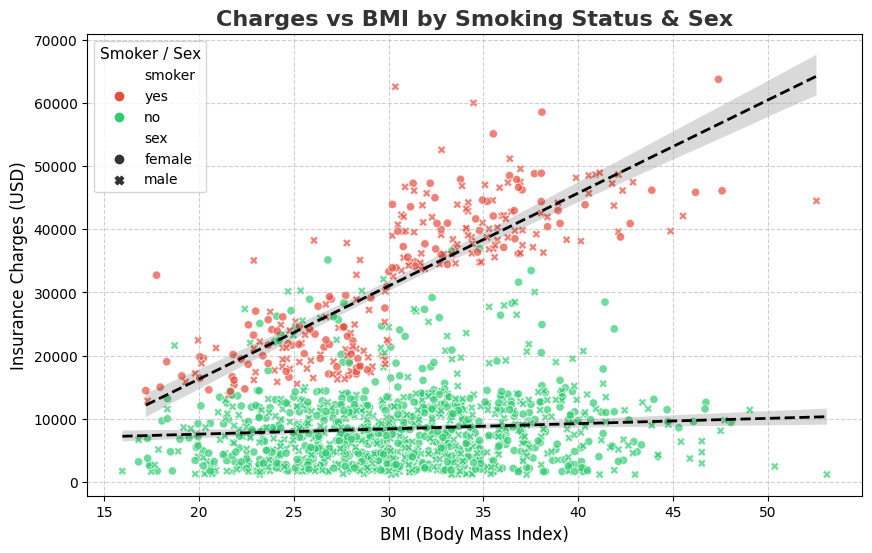

In [154]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x="bmi",
    y="charges",
    hue="smoker",
    style="sex",
    data=data_vis,
    palette={"yes": "#E74C3C", "no": "#2ECC71"},
    alpha=0.7,
    edgecolor="white",
    linewidth=0.6
)

sns.regplot(
    x="bmi",
    y="charges",
    data=data_vis[data_vis["smoker"] == "yes"],
    scatter=False,
    color="black",
    line_kws={"linestyle": "--", "linewidth": 2}
)

sns.regplot(
    x="bmi",
    y="charges",
    data=data_vis[data_vis["smoker"] == "no"],
    scatter=False,
    color="black",
    line_kws={"linestyle": "--", "linewidth": 2}
)


plt.title("Charges vs BMI by Smoking Status & Sex",
          fontsize=16, fontweight="bold", color="#333333")
plt.xlabel("BMI (Body Mass Index)", fontsize=12)
plt.ylabel("Insurance Charges (USD)", fontsize=12)
plt.legend(title="Smoker / Sex", fontsize=10, title_fontsize=11)
plt.grid(linestyle="--", alpha=0.6)

plt.show()


## 👶 Distribusi Jumlah Anak  

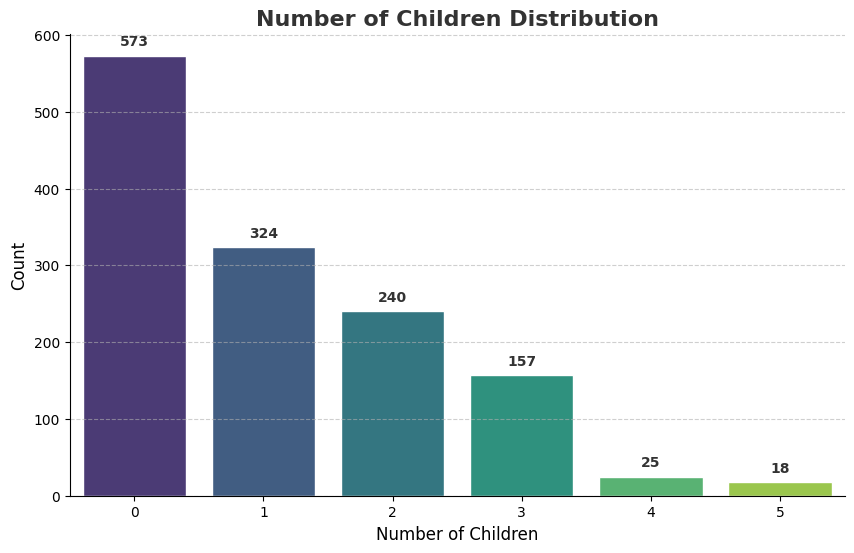

In [155]:
plt.figure(figsize=(10, 6))

# Countplot dengan style modern
sns.countplot(
    x="children",
    data=data_vis,
    palette="viridis",
    edgecolor="white"
)

for p in plt.gca().patches:
    plt.gca().annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, fontweight="bold", color="#333333",
        xytext=(0, 5),
        textcoords="offset points"
    )


plt.title("Number of Children Distribution",
          fontsize=16, fontweight="bold", color="#333333")
plt.xlabel("Number of Children", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.6)

sns.despine(top=True, right=True)

plt.show()


## 🔥 Heatmap Korelasi  

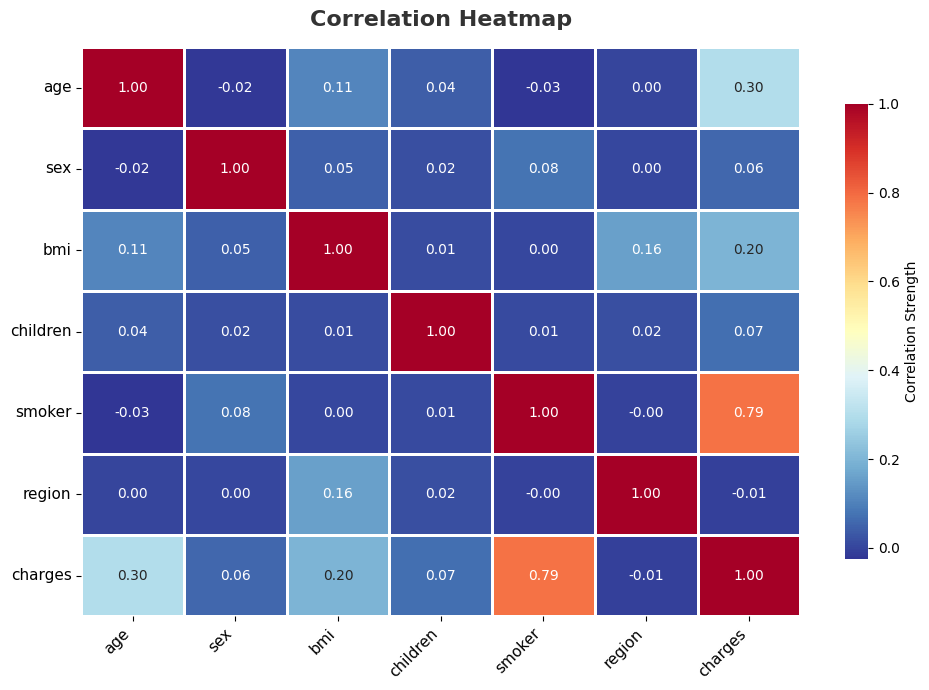

In [156]:
encoded_df = clean_data.copy()
for col in ['sex', 'smoker', 'region']:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col])

plt.figure(figsize=(10, 7))
sns.heatmap(
    encoded_df.corr(),
    annot=True,
    cmap="RdYlBu_r",
    fmt=".2f",
    linewidths=0.8,
    linecolor="white",
    cbar_kws={"shrink": 0.8, "label": "Correlation Strength"}
)

plt.title("Correlation Heatmap",
          fontsize=16, fontweight="bold", color="#333333", pad=15)

plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()


# ⛏️ Data Mining  

Pada tahap ini dilakukan persiapan data agar dapat digunakan dalam proses pemodelan machine learning. Beberapa langkah yang dilakukan meliputi transformasi data kategorikal, pemisahan fitur dan label, serta pembagian dataset menjadi data latih dan data uji.  


In [157]:
data_res = clean_data.copy()

## 🔤 Label Encoder  
Digunakan untuk mengubah data kategorikal (seperti sex, smoker, dan region) menjadi bentuk numerik agar dapat diproses oleh algoritma machine learning.  


In [158]:
le = LabelEncoder()
for col in ['sex', 'smoker', 'region']:
    data_res[col] = le.fit_transform(data_res[col])


## 🧩 Feature & Label  
Menentukan variabel independen (fitur) yang digunakan untuk prediksi serta variabel dependen (label) yang akan diprediksi, yaitu biaya asuransi (charges).  


In [159]:
feature = data_res.drop("charges", axis=1)
label = data_res["charges"]


## ✂️ Splitting Data  
Membagi dataset menjadi **data latih (training set)** dan **data uji (testing set)** agar model dapat dilatih sekaligus diuji performanya.  

In [160]:
X_train, X_test, y_train, y_test = train_test_split(
    feature, label, test_size=0.2, random_state=42)


# 🤖 Model Implementation  

Pada tahap ini dilakukan penerapan berbagai algoritma machine learning untuk memprediksi biaya asuransi kesehatan. Beberapa model regresi digunakan untuk membandingkan performa dan mengetahui model mana yang memberikan hasil terbaik.  


## 🛠️ Model Parameter

| Model                  | Parameter Utama |
|-------------------------|-----------------|
| K-Nearest Neighbors     |                 |
| Random Forest           | n_estimators=100, random_state=42 |
| Gradient Boosting       | n_estimators=100, random_state=42 |
| Neural Network (MLP)    | hidden_layer_sizes=(100,), max_iter=500, random_state=42 |


In [161]:
models = {
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Neural Network (MLP)": MLPRegressor(hidden_layer_sizes=(100,),
                                         max_iter=500,
                                         random_state=42)
}


# ⚡ Training & Evaluation

Pada tahap ini dilakukan proses pelatihan model menggunakan data latih dan evaluasi menggunakan data uji. Tujuannya adalah untuk mengukur sejauh mana model dapat memprediksi dengan baik terhadap data yang belum pernah dilihat sebelumnya. Evaluasi dilakukan dengan menggunakan metrik seperti **Accuracy, Precision, Recall,** dan **F1-Score**, sehingga dapat diketahui model mana yang memiliki performa terbaik.


In [162]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred) * 100
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results.append({
        "Model": name,
        "R² (%)": round(r2, 2),
        "MAE": round(mae, 2),
        "MSE": round(mse, 2)
    })

results_df = pd.DataFrame(results)

# tampilkan tabel dengan pipeline
results_df.pipe(
    lambda df: df.style.format({
        "R² (%)": "{:.2f}",
        "MAE": "{:.2f}",
        "MSE": "{:.2f}"
    })
)


,Model,R² (%),MAE,MSE
0,K-Nearest Neighbors,4.98,8896.22,174609724.58
1,Random Forest,88.34,2555.93,21420846.46
2,Gradient Boosting,90.11,2508.42,18170259.11
3,Neural Network (MLP),13.95,9604.94,158125880.36


## 🔎 Model Performance

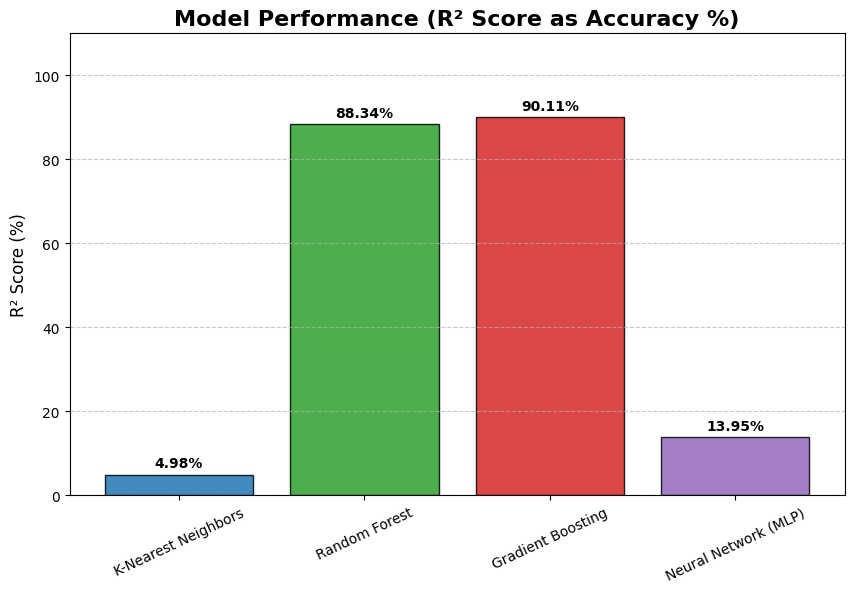

In [163]:
plt.figure(figsize=(10, 6))
bars = plt.bar(
    results_df["Model"],
    results_df["R² (%)"],
    color=["#1F77B4", "#2CA02C", "#D62728", "#9467BD", "#FF7F0E"],
    edgecolor="black",
    alpha=0.85
)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 1,
        f"{yval:.2f}%",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )

plt.title("Model Performance (R² Score as Accuracy %)",
          fontsize=16, fontweight="bold")
plt.ylabel("R² Score (%)", fontsize=12)
plt.xticks(rotation=25, fontsize=10)
plt.ylim(0, 110)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


# ✅ Conclusion

Berdasarkan hasil evaluasi, berikut adalah performa masing-masing model:

| Model                  | R² (%) | MAE     | MSE          |
|-------------------------|--------|---------|--------------|
| K-Nearest Neighbors     | 4.98   | 8896.22 | 174609724.58 |
| Random Forest           | 88.34  | 2555.93 | 21420846.46  |
| Gradient Boosting       | 90.11  | 2508.42 | 18170259.11  |
| Neural Network (MLP)    | 13.95  | 9604.94 | 158125880.36 |

## 🏆  Pemilihan Model Terbaik

Model **Gradient Boosting** dipilih sebagai algoritma terbaik karena:  
- Memiliki **nilai R² tertinggi (90.11%)**, yang menunjukkan kemampuan terbaik dalam menjelaskan variansi data.  
- Memberikan **error terkecil** baik pada MAE maupun MSE, sehingga prediksi lebih akurat dan stabil.  
- Konsistensi hasil menunjukkan model ini lebih handal dibandingkan algoritma lainnya dalam kasus ini.  